# 6. Kenel Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import kernels
import regressions

In [2]:
def create_toy_data(func, n=10, std=1., domain=[0., 1.]):
    x = np.linspace(domain[0], domain[1], n)
    t = func(x) + np.random.normal(scale=std, size=n)
    return x, t

def sinusoidal(x):
        return np.sin(2 * np.pi * x)

## 6.1Dual Representations

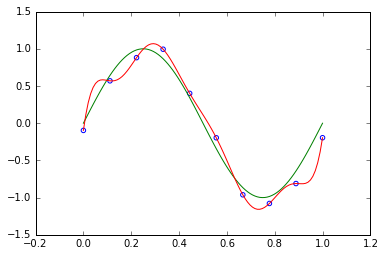

In [3]:
x_train, y_train = create_toy_data(sinusoidal, n=10, std=0.1)
x = np.linspace(0, 1, 100)

gpr = regressions.GaussianProcessRegression(kernel=kernels.RBF(np.array([1., 15.])), beta=int(1e10))
gpr.fit(x_train, y_train)

y = gpr.predict(x)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr")
plt.show()

## 6.4.2 Gaussian processes for regression

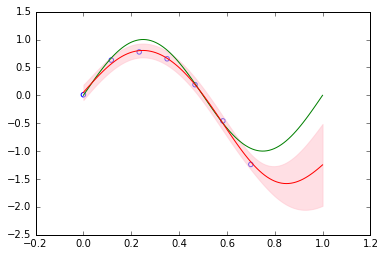

In [4]:
x_train, y_train = create_toy_data(sinusoidal, n=7, std=0.1, domain=[0., 0.7])
x = np.linspace(0, 1, 100)

gpr = regressions.GaussianProcessRegression(kernel=kernels.RBF(np.array([1., 15.])), beta=100)
gpr.fit(x_train, y_train)

y, y_std = gpr.predict_dist(x)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr")
plt.fill_between(x, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")
plt.show()

## 6.4.3 Learning the hyperparameters

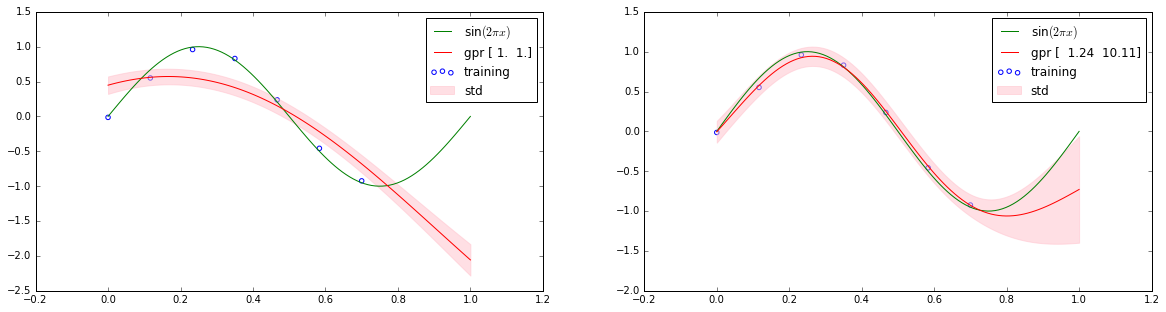

In [5]:
x_train, y_train = create_toy_data(sinusoidal, n=7, std=0.1, domain=[0., 0.7])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
gpr = regressions.GaussianProcessRegression(kernel=kernels.RBF(np.array([1., 1.])), beta=100)
gpr.fit(x_train, y_train)
y, y_std = gpr.predict_dist(x)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr {}".format(gpr.kernel.params))
plt.fill_between(x, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")
plt.legend()

plt.subplot(1, 2, 2)
gpr.fit_kernel(x_train, y_train, iter_max=100)
y, y_std = gpr.predict_dist(x)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, y, color="r", label="gpr {}".format(np.round(gpr.kernel.params, 2)))
plt.fill_between(x, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")
plt.legend()
plt.show()

## 6.4.4 Automatic relevance determination

In [6]:
def create_toy_data_3d(func, n=10, std=1.):
    x0 = np.linspace(0, 1, n)
    x1 = x0 + np.random.normal(scale=std, size=n)
    x2 = np.random.normal(scale=std, size=n)
    t = func(x0) + np.random.normal(scale=std, size=n)
    return np.vstack((x0, x1, x2)).T, t

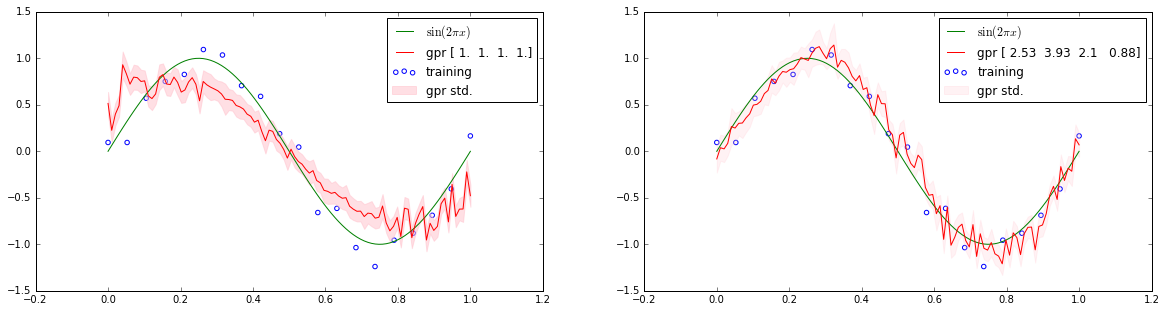

In [7]:
x_train, y_train = create_toy_data_3d(sinusoidal, n=20, std=0.1)
x0 = np.linspace(0, 1, 100)
x1 = x0 + np.random.normal(scale=0.1, size=100)
x2 = np.random.normal(scale=0.1, size=100)
x = np.vstack((x0, x1, x2)).T

model = regressions.GaussianProcessRegression(kernel=kernels.RBF(np.array([1., 1., 1., 1.])), beta=100)
model.fit(x_train, y_train)
y, y_std = model.predict_dist(x)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], y_train, facecolor="none", edgecolor="b", label="training")
plt.plot(x[:, 0], sinusoidal(x[:, 0]), color="g", label="$\sin(2\pi x)$")
plt.plot(x[:, 0], y, color="r", label="gpr {}".format(model.kernel.params))
plt.fill_between(x[:, 0], y - y_std, y + y_std, color="pink", alpha=0.5, label="gpr std.")
plt.legend()
plt.ylim(-1.5, 1.5)

model.fit_kernel(x_train, y_train, learning_rate=0.001, iter_max=100)
y, y_std = model.predict_dist(x)
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], y_train, facecolor="none", edgecolor="b", label="training")
plt.plot(x[:, 0], sinusoidal(x[:, 0]), color="g", label="$\sin(2\pi x)$")
plt.plot(x[:, 0], y, color="r", label="gpr {}".format(np.round(model.kernel.params, 2)))
plt.fill_between(x[:, 0], y - y_std, y + y_std, color="pink", alpha=0.2, label="gpr std.")
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()